In [64]:
from pathlib import Path
import subprocess
import zarr
import os
import h5py as h5
import numpy as np
import torch
from einops import rearrange, reduce, repeat
from dataclasses import dataclass
# from mrboost import preprocessing as pre
# from mrboost import io_utils as iou
# from mrboost import reconstruction as recon
# from mrboost import computation as comp
# from mrboost.density_compensation import *
# from mrboost.coil_sensitivity_estimation import *
# from mrboost.torch_utils import *


from Network import BrainNet
from Loss import *
from NeuralODE import *
from Utils import *
from Registration import registration

%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'Network'

In [ ]:
img_path = Path("/data/anlab/Chunxu/DL_MOTIF/2_P2P/DeCoLearn3D/results/CCIR_01168_ONC-DCE/0.zarr")
moved_path = Path('/data/anlab/Chunxu/DL_MOTIF')/"3_MVF"/'results'/'CCIR_01168_ONC-DCE'
warp_path = Path('/data/anlab/Chunxu/DL_MOTIF')/"3_MVF"/'results'/'CCIR_01168_ONC-DCE'

/data-local/anlab/Chunxu/miniconda3/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1678411187366/work/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Iteration: 20 Loss_sim: 3.815e-02 loss_J: 0.000e+00
Iteration: 40 Loss_sim: 3.609e-02 loss_J: 0.000e+00
Iteration: 60 Loss_sim: 3.538e-02 loss_J: 0.000e+00
Iteration: 80 Loss_sim: 3.482e-02 loss_J: 0.000e+00
Iteration: 100 Loss_sim: 3.424e-02 loss_J: 0.000e+00
Iteration: 120 Loss_sim: 3.390e-02 loss_J: 0.000e+00
Iteration: 140 Loss_sim: 3.344e-02 loss_J: 0.000e+00
Iteration: 160 Loss_sim: 3.314e-02 loss_J: 0.000e+00
Iteration: 180 Loss_sim: 3.288e-02 loss_J: 7.768e-11
Iteration: 200 Loss_sim: 3.266e-02 loss_J: 6.427e-09
Iteration: 220 Loss_sim: 3.248e-02 loss_J: 2.030e-08
Iteration: 240 Loss_sim: 3.230e-02 loss_J: 5.963e-08
Iteration: 260 Loss_sim: 3.226e-02 loss_J: 6.579e-08
Iteration: 280 Loss_sim: 3.205e-02 loss_J: 1.582e-07
Iteration: 300 Loss_sim: 3.195e-02 loss_J: 2.190e-07
Iteration: 20 Loss_sim: 7.521e-02 loss_J: 0.000e+00
Iteration: 40 Loss_sim: 7.233e-02 loss_J: 0.000e+00
Iteration: 60 Loss_sim: 7.123e-02 loss_J: 0.000e+00
Iteration: 80 Loss_sim: 7.031e-02 loss_J: 0.000e+00
I

TypeError: list indices must be integers or slices, not tuple

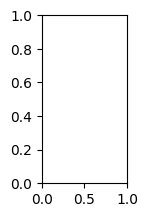

In [ ]:
from matplotlib import pyplot as plt
# plt.subplots(figsize=(10, 5))
# plot moved image, and the original image, each of them have 5 different slices, plot them in 2 rows and 5 columns
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(moved_list[i, 0, :, :])
    plt.subplot(2, 5, i+6)
    plt.imshow(fixed_list[i, 0, :, :])